# A4 Face Detection and Recognition 
Student Name: Fulin Huang 

Student ID: 260740689 

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import os

## 1 Data Aquisition 

#### Test Image 

(682, 1024, 3)


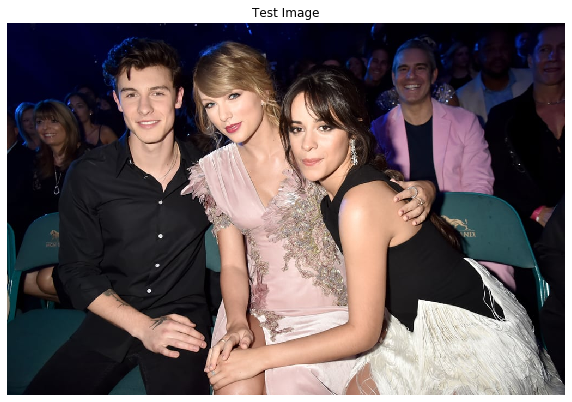

((-0.5, 1023.5, 681.5, -0.5), None)

In [3]:
# Image Reference:https://www.popsugar.com/celebrity/photo-gallery/44850420/image/44865671/Shawn-Mendes-Taylor-Swift-Camila-Cabello
test_image = cv2.imread('test.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
print(test_image.shape)

plt.figure(figsize=(10,10))
plt.imshow(test_image),plt.title("Test Image")
plt.axis('off'), plt.show()

#### Training Images 

#### 1 Describe how you selected the images with respect to the conditions of the detection/recognition methods

I resized the training images to (128, 128) and convert the color to grayscale to make computation more efficient. The reason to make the images the same color and same dimension is for data consistency. It also helps making the computation eaiser in later steps. 

#### Show at least 5 example images for each individual

----- Training Images -----
There are three celebrities in training images:
    Taylor Swift
    Shane Mendes
    Camila Cabello
All training images are collected from Google Images


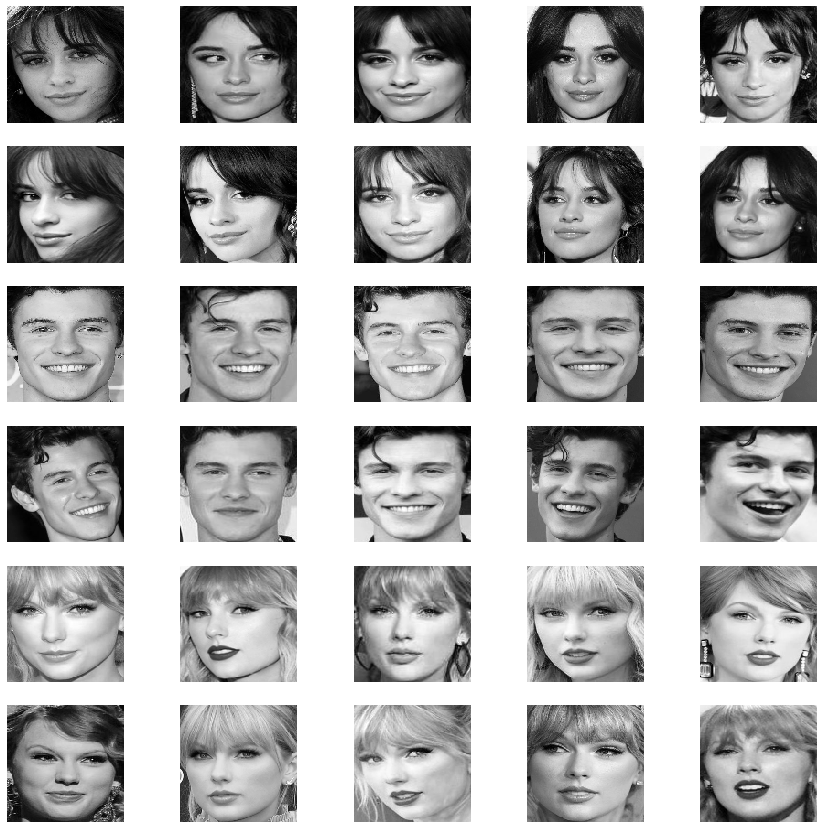

In [144]:
entry = os.listdir('Training_Image')

size = (128, 128)

# Append and Resize Image 
image_list = [] 

for file in sorted(entry): 
    image = cv2.imread('./Training_Image/' + file)
    image_1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_1 = cv2.resize(image_1, size)
    image_list.append(image_1)
    
plt.figure(figsize=(15,15))

# Please read README.txt for training images reference 
print("----- Training Images -----")
print("There are three celebrities in training images:")
print("    Taylor Swift")
print("    Shane Mendes")
print("    Camila Cabello")
print("All training images are collected from Google Images")
for i in range (0, len(image_list)): 
    plt.subplot(6, 5, i+1) 
    plt.axis('off')
    plt.imshow(image_list[i], cmap='gray')

## 2 Eigenface Representation

#### 1 Produce and eigenface representation for your training data through PCA

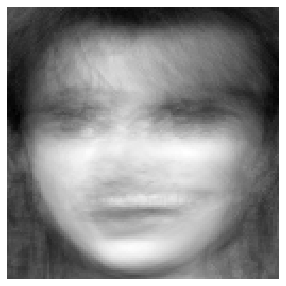

Image Matrix has shape:  (16384, 30)
cov matrix  (30, 30)
(16384, 17)


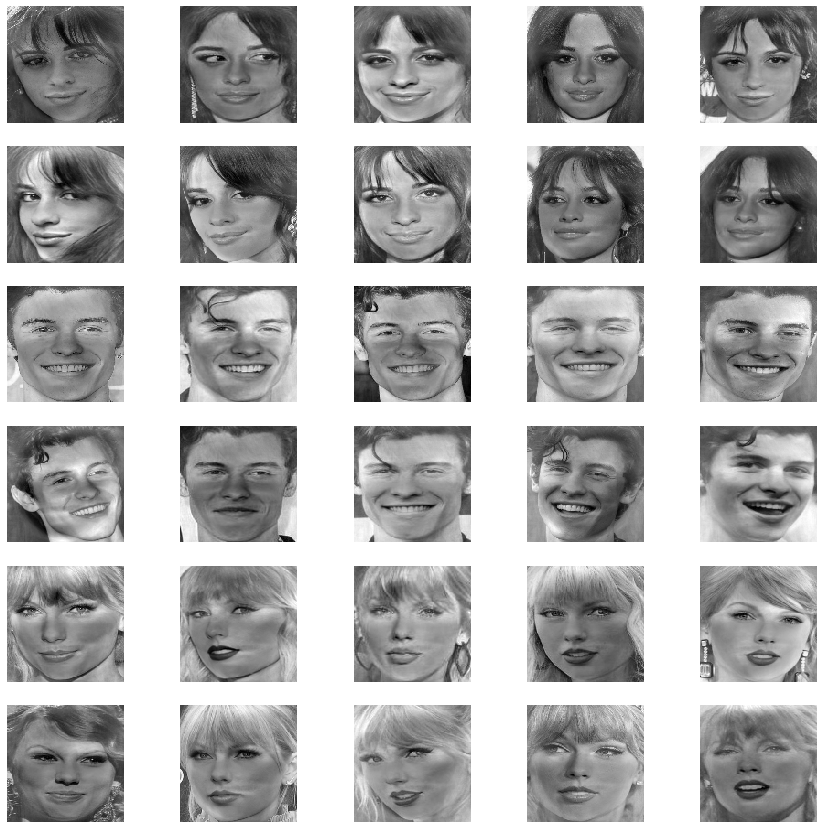

In [471]:
#Check this: https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/
# And this: https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184
# SVD: https://medium.com/machine-learning-world/linear-algebra-svd-and-pca-5979f739e95a
# eigenface: chrome-extension://cbnaodkpfinfiipjblikofhlhlcickei/src/pdfviewer/web/viewer.html?file=http://www.vision.jhu.edu/teaching/vision08/Handouts/case_study_pca1.pdf
# http://laid.delanover.com/explanation-face-recognition-using-eigenfaces/

image_vector_list = [] 
image_sum = np.zeros(shape=(128,128)).ravel()
                    
for image in image_list: 
    # Obtain face images 
    # Represent image image as a vector 
    image_vector = image.reshape(128,128).ravel()
    image_sum += image_vector 
    image_vector_list.append(image_vector)

# Compute average face vector 
average_face = (image_sum/len(image_list)).ravel()
average_face_image = average_face.reshape(128,128)
plt.figure(figsize=(5,5))
plt.imshow(average_face_image, cmap='gray'), plt.axis('off'), plt.show()

# Normalize the training set 
new_image_vector_list = []
for image_vector in image_vector_list: 
    image_vector = np.subtract(image_vector, average_face).ravel()
    new_image_vector_list.append(image_vector)

# Display average faces 
plt.figure(figsize=(15,15))
for i in range (0, len(new_image_vector_list)): 
    plt.subplot(6, 5, i+1) 
    plt.axis('off')
    plt.imshow(new_image_vector_list[i].reshape(128, 128), cmap='gray')    

# Calculate Covariance C = AA^T (less computationaly expensive)
# Step 1) Concatenate vectors into a matrix 
image_matrix = new_image_vector_list[0]
for i in range(1, len(new_image_vector_list)): 
    b = new_image_vector_list[i]
    image_matrix = np.column_stack((image_matrix, b))    

print("Image Matrix has shape: ", image_matrix.shape)

# Step 2) Calculate Covariance 
cov_matrix = np.cov(image_matrix.T)
print("cov matrix ", cov_matrix.shape)

# Compute the eigenvector and eigenvalue 
eigenvalue, eigenvector = np.linalg.eig(cov_matrix) 

# Make eigen-pair 
eigen_pair = [(np.abs(eigenvalue[i]), eigenvector[i]) for i in range(len(eigenvalue))]
# for i in range(len(eigen_pair)):
#     print("old eigenvector", eigen_pair[i][1])

new_eigenvector = [] 
new_val = np.zeros(shape=(128,128)).ravel()
for i in range(len(eigen_pair)):
    # We previously calculate eigenvectors for A^T*A
    # Eigenvectors for A*A^T are Ui = A*Vi 
    new_val = np.dot(image_matrix, eigen_pair[i][1])
    new_eigenvector.append(new_val)

# Update eigen_pair 
new_eigen_pair = [(eigen_pair[i][0], new_eigenvector[i]) for i in range(len(eigen_pair))]

# Sort eigen-pair in descending form 
new_eigen_pair.sort(key=lambda x:x[0], reverse=True)

# Variance captured by each component 
tot = sum(eigenvalue)
var_exp = [(i/tot) for i in sorted(eigenvalue, reverse=True)]

# Total (Cumulative) sum 
cum_sum = np.cumsum(var_exp)
cum_sum_reverse = np.flipud(cum_sum)

k = 17  # Eigenvector Number used for calculation 
# Create a matrix correspond to the eigenvectors 
chosen_eigen_pair = new_eigen_pair[0][1].reshape(128*128,1)
for i in range(1, k): 
    b = new_eigen_pair[i][1].reshape(128*128,1)
    chosen_eigen_pair = np.hstack((chosen_eigen_pair, b))

new_matrix = chosen_eigen_pair
print(new_matrix.shape)
 

#### 2 Plot the fraction of total variance against the eigenvector number in descending order (i.e. total variance vs. the number of principal components).

Cumulative sum:  [1.         1.         0.99330364 0.98565245 0.9779129  0.96943957
 0.96038321 0.95105266 0.94026113 0.92885419 0.91664386 0.90410064
 0.89036257 0.87411865 0.8576871  0.839995   0.82174086 0.8025081
 0.78212989 0.76106654 0.73714648 0.71152752 0.68268853 0.65359092
 0.61743735 0.57447536 0.5131618  0.44528384 0.35858861 0.23252649]
Number of Eigenvector  30


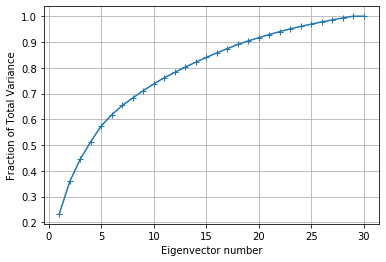

In [12]:
print("Cumulative sum: ", cum_sum_reverse)
print("Number of Eigenvector ", num_pair)

# Plot Diagram     
plt.xlabel("Eigenvector number")
plt.ylabel("Fraction of Total Variance")
x = (np.arange(num_pair, 0, -1))
plt.plot(x, cum_sum_reverse, marker='+')
plt.grid(True)
plt.show() 

#### 3  Plot the normalized variance (eigenvalues) against the eigenvector number used for computation.

Normalized variance  [0.23252648771532028, 0.1260621232121575, 0.08669523300655763, 0.06787795608431502, 0.06131356010462515, 0.042961990219281765, 0.036153572300469686, 0.029097602975586393, 0.028838994250929544, 0.025618963888891524, 0.023920060125414082, 0.021063341240034183, 0.020378211772732257, 0.019232758522633057, 0.018254147577122536, 0.017692092264290582, 0.01643155220803394]


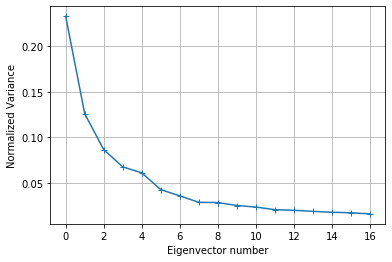

In [11]:
y = var_exp[:k]
print("Normalized variance ", y)

# Plot Diagram     
plt.xlabel("Eigenvector number")
plt.ylabel("Normalized Variance")
x = (np.arange(0, k, 1))
plt.plot(x, y, marker='+')
plt.grid(True)
plt.show() 
          

#### 4 Do you need all the vectors to represent the data? Discuss

We do not need all the vectors to represent the data. In the above experiment, I used k = 17 (originally 30) vectors, and the total variance is about 90%. Furthermore, using all the vectors is much more computationally expensive. 

#### 5 Display the first 5 eigenfaces

(16384, 17)


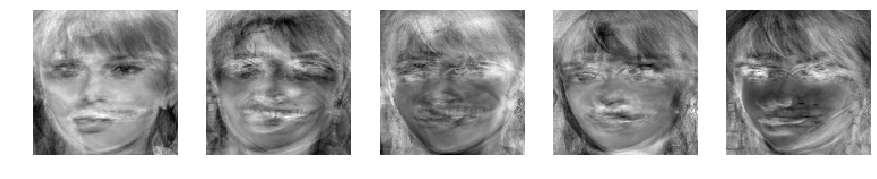

In [174]:
print(new_matrix.shape)

num_eigenface = 5

plt.figure(figsize=(15,15))
for i in range (0, num_eigenface): 
    plt.subplot(1, 5, i+1) 
    plt.axis('off')
    plt.imshow(new_matrix[:,i].reshape(128,128), cmap='gray')    


## 3 Neighbourhood Clustering

#### 1 For every training image, find the nearest neighbour (L2 distance), and check whether both images belong to the same person. 

In [297]:
from sklearn.neighbors import KNeighborsClassifier 
    
# https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
# https://medium.com/beesightsoft/build-your-own-face-recognition-using-face-recognition-library-and-k-nearest-neighbors-classifier-611ffc973d4b

# Prepare Feature and Label 
feature = image_matrix 
label = []
label[:10] = ['Camila Cabello' for x in range(10)]
label[10:20] = ['Shane Mendes' for x in range(10, 20)]
label[20:30] = ['Taylor Swift' for x in range(20, 30)]

print("Label: ", label)
print(feature.T.shape)
# Apply KNN Neighbor 
near_neighbor = KNeighborsClassifier(n_neighbors = 2, metric = 'l2')
near_neighbor.fit(feature.T, label)


# Make Prediction 
predict = near_neighbor.predict(feature.T)
print("Prediction: ", predict)

Label:  ['Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift']
(30, 16384)
Prediction:  ['Camila Cabello' 'Camila Cabello' 'Camila Cabello' 'Camila Cabello'
 'Camila Cabello' 'Camila Cabello' 'Camila Cabello' 'Camila Cabello'
 'Camila Cabello' 'Camila Cabello' 'Shane Mendes' 'Shane Mendes'
 'Shane Mendes' 'Shane Mendes' 'Shane Mendes' 'Camila Cabello'
 'Shane Mendes' 'Shane Mendes' 'Shane Mendes' 'Shane Mendes'
 'Taylor Swift' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift' 'Camila Cabello' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift'

#### 2 What fraction of your data has a neighbour that is of the same person?

In [298]:
# Calculate Fraction of Correct Data 
count = 0
for i in range(len(predict)):
    if predict[i] == label[i]:
        count+=1

fraction = count/len(predict)
print("{} of the data are correct".format(fraction))

0.9333333333333333 of the data are correct


#### 3 Do this both in the original high dimensional pixel space and then in the eigenspace, and compare the accuracy values. 

In [299]:
# Prepare Feature and Label 
feature_eigen = new_matrix.T
label_eigen = label 
print(label_eigen)
print(feature_eigen.shape)
print(image_matrix.shape)

num = (feature_eigen.shape[0])
term = [] 

for i in range(len(image_matrix[1])): 
    reconstruct_value = 0
    for j in range(num):

        value = np.dot(image_matrix[:,i], feature_eigen[j,:])
        reconstruct_value += value*feature_eigen[j,:]
    term.append(reconstruct_value)

print(len(term))

eigenspace = term[0]
for i in range(1, len(term)): 
    b = term[i]
    eigenspace = np.column_stack((eigenspace, b)) 
print("eigenspace ", eigenspace.shape)


# Apply KNN Neighbor 
near_neighbor_eigen = KNeighborsClassifier(n_neighbors = 2, metric = 'l2')
near_neighbor_eigen.fit(eigenspace.T, label_eigen)

# Make Prediction 
predict_eigen = near_neighbor_eigen.predict(eigenspace.T)
print("Prediction: ", predict_eigen, "\n")

# Calculate Fraction of Correct Data 
count_eigen = 0
for i in range(len(predict_eigen)):
    if predict_eigen[i] == label_eigen[i]:
        count_eigen+=1

fraction_eigen = count_eigen/len(predict_eigen)
print("{} of the data are correct".format(fraction_eigen), "\n")

print(" ------------- Comparison ------------")
print("Accuracy in high dim pixel space: ", fraction)
print("Accuracy in eigenspace:           ", fraction_eigen)

['Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Camila Cabello', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Shane Mendes', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift']
(17, 16384)
(16384, 30)
30
eigenspace  (16384, 30)
Prediction:  ['Camila Cabello' 'Camila Cabello' 'Camila Cabello' 'Camila Cabello'
 'Camila Cabello' 'Camila Cabello' 'Camila Cabello' 'Camila Cabello'
 'Camila Cabello' 'Camila Cabello' 'Shane Mendes' 'Shane Mendes'
 'Shane Mendes' 'Shane Mendes' 'Shane Mendes' 'Camila Cabello'
 'Shane Mendes' 'Shane Mendes' 'Shane Mendes' 'Shane Mendes'
 'Taylor Swift' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift' 'Camila Cabello' 'Taylor Swift'

#### 4 Would you expect there to be a significant difference?

From the result above, there is only a very small distance between accurarcy in high dimensional pixel space and in eigenspace. Hence, I can conclude that the eigenfaces can accurately represent the training images. 

## 4 Face Detection & Recognition

#### 1 Display your image with bounding boxes around detected faces for your best threshold

In [ ]:
test_image_gray = test_image 
test_image_gray = cv2.cvtColor(test_image_gray, cv2.COLOR_BGR2GRAY)
test_average_face = average_face 

test_new_matrix = new_matrix
print(test_new_matrix.shape)
print(image.shape)
print(test_average_face.shape)


vectors = [] 
average_weight_vector = np.zeros(test_new_matrix.shape[0]).ravel() 
value = 0
for i in range(test_new_matrix.shape[1]):
    average_weight_vector = np.dot(test_average_face, test_new_matrix[:,i])
    vectors.append(average_weight_vector)

average_face_reconstruct = np.zeros(test_new_matrix.shape[0]).ravel() 
for i in range (test_new_matrix.shape[1]):
    average_face_reconstruct += vectors[i] * test_new_matrix[:,i]
    print("average_face_reconstruct", average_face_reconstruct)
average_face_reconstruct = average_face_reconstruct/np.linalg.norm(average_face_reconstruct)

    
# Normalize the training set 
new_image_vector_list = []
for image_vector in image_vector_list: 
    image_vector = np.subtract(image_vector, average_face).ravel()
    new_image_vector_list.append(image_vector)


# Create a sliding window to extract small portion of image from the test image 
def slidingWindow(image, stepSize, windowSize, test_new_matrix, threshold, average_weight_vector):
    count = 0
    y_pos = []
    x_pos = []
    h = image.shape[0]
    w = image.shape[1]
    y1 = windowSize[0]
    x1 = windowSize[1]
    
    reconstruction_term = [] 
    # define window size and step size 
    for y in range (0, h, stepSize): 
        for x in range (0, w, stepSize):
    
            # Extract image
            window_image = image[y:y + y1, x: x + x1]
            window_image = cv2.resize(window_image, (128, 128)).ravel()
            window_image = np.subtract(window_image, test_average_face).ravel() 

            # Reconstruction 
            test_reconstruct_value = np.zeros(test_new_matrix.shape[0]).ravel() 
            reconstruction_weight_vector = 0

            for i in range(test_new_matrix.shape[1]):
                reconstruction_weight_vector = np.dot(window_image, test_new_matrix[:,i])
                test_reconstruct_value += reconstruction_weight_vector * test_new_matrix[:,i]
            test_reconstruct_value = test_reconstruct_value/np.linalg.norm(test_reconstruct_value)

            distance = cv2.norm(test_reconstruct_value-average_face_reconstruct, cv2.NORM_L2)*100
            
            print(distance)

            if distance < threshold: 
                count += 1
                y_pos.append(y)
                x_pos.append(x)
                

    position_pair = [(y_pos[i], x_pos[i]) for i in range(len(y_pos))]
    return count, position_pair 
            
stepSize = 50
windowSize = [150,150]
threshold = 10
# Extract window from test image 
count, position_pair = slidingWindow(test_image_gray, stepSize, windowSize, test_new_matrix, threshold, average_weight_vector)            

print("Count", count)
print(len(position_pair))

# Display test image with bounding boxes
bounding_box_image = test_image.copy()
plt.figure(figsize=(15,5))
for i in range(len(position_pair)): 
    x_pos = position_pair[i][1]
    y_pos = position_pair[i][0]
    print(x_pos, y_pos)
    cv2.rectangle(bounding_box_image, (x_pos, y_pos), (x_pos+windowSize[1], y_pos+windowSize[0]), (0, 255, 255), 2)

plt.imshow(bounding_box_image), plt.title("Training Image with Bounding Box")
plt.axis('off'),plt.show()
    

(16384, 17)
(195, 151, 3)
(16384,)
Count 11
11


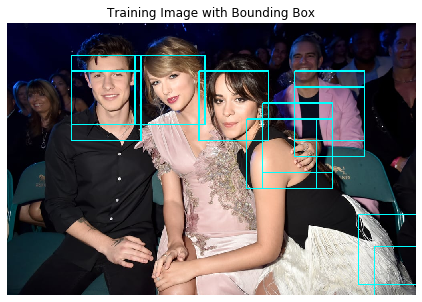

((-0.5, 1023.5, 681.5, -0.5), None)

In [455]:
test_image_gray = test_image 
test_image_gray = cv2.cvtColor(test_image_gray, cv2.COLOR_BGR2GRAY)
test_average_face = average_face 

test_new_matrix = new_matrix
print(test_new_matrix.shape)
print(image.shape)
print(test_average_face.shape)
    
# Create a sliding window to extract small portion of image from the test image 
def slidingWindow(image, stepSize, windowSize, test_new_matrix, threshold, average_weight_vector):
    count = 0
    y_pos = []
    x_pos = []
    h = image.shape[0]
    w = image.shape[1]
    y1 = windowSize[0]
    x1 = windowSize[1]
    max_val = 2000
    detected_face_eigenspace = [] 
    
    # define window size and step size 
    for y in range (0, h, stepSize): 
        for x in range (0, w, stepSize):
    
            # Extract image
            window_image = image[y:y + y1, x: x + x1]
            window_image = cv2.resize(window_image, (128, 128)).ravel()
            window_image = np.subtract(window_image, test_average_face).ravel() 
            
            # Reconstruction 
            test_reconstruct_value = np.zeros(test_new_matrix.shape[0]).ravel() 
            reconstruction_weight_vector = 0

            vector = [] 
            for i in range(test_new_matrix.shape[1]):
                test_value = np.dot(window_image, test_new_matrix[:,i])
                reconstruction_weight_vector += test_value * test_new_matrix[:,i]
            reconstruction_weight_vector += test_average_face

            distance = cv2.norm(reconstruction_weight_vector - window_image,cv2.NORM_L2)
    
            if distance < threshold: 
                count += 1
                y_pos.append(y)
                x_pos.append(x)
                detected_face_eigenspace.append(reconstruction_weight_vector)
    
    position_pair = [(y_pos[i], x_pos[i]) for i in range(len(y_pos))]
    return count, position_pair,detected_face_eigenspace 
            
stepSize =  40# 24 #40
windowSize = [175, 175]    #145
threshold = 16500 # 8500  #7900
# Extract window from test image 
count, position_pair, detected_face_eigenspace = slidingWindow(test_image_gray, stepSize, windowSize, test_new_matrix, threshold, average_weight_vector)            

print("Count", count)
print(len(position_pair))

# Display test image with bounding boxes
bounding_box_image = test_image.copy()
plt.figure(figsize=(15,5))
for i in range(len(position_pair)): 
    x_pos = position_pair[i][1]
    y_pos = position_pair[i][0]
    cv2.rectangle(bounding_box_image, (x_pos, y_pos), (x_pos+windowSize[1], y_pos+windowSize[0]), (0, 255, 255), 2)

plt.imshow(bounding_box_image), plt.title("Training Image with Bounding Box")
plt.axis('off'),plt.show()
    

#### 2 For the windows in which a face is correctly detected, project the contents of the window to your eigenspace and find the nearest neighbour from your data. The identity of the detected face will be based on the identity of the closest person in the training set

--------- Sliding Window Algorithm with stepsize = 40, window size (175,175), and threshold 16500 -------
[175, 175]


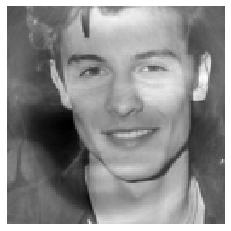

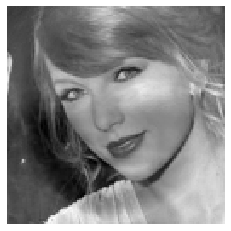

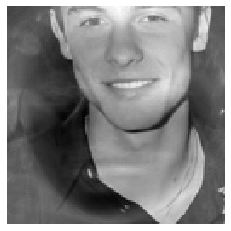

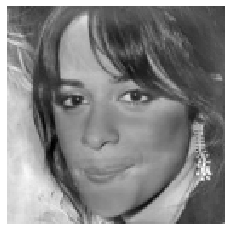

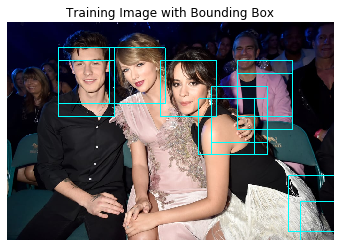

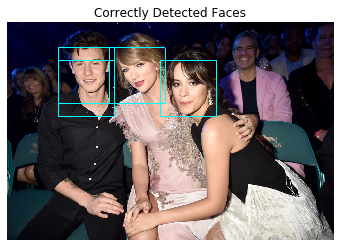

Prediction:  ['Camila Cabello'] ['Taylor Swift'] ['Camila Cabello'] 

--------- Sliding Window Algorithm with stepsize = 24, window size (155,155), and threshold 15000 -------
8


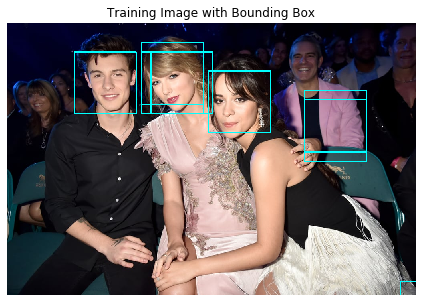

[155, 155]


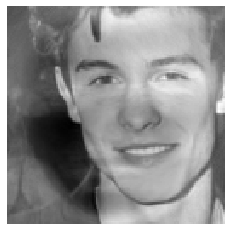

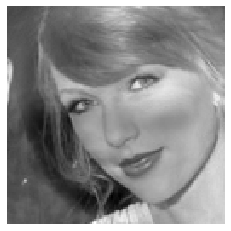

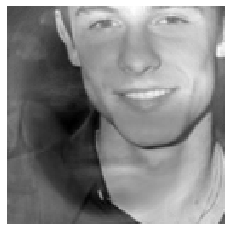

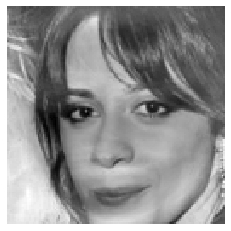

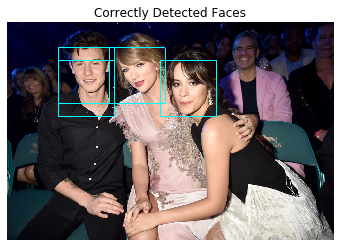

Prediction:  ['Shane Mendes'] ['Taylor Swift'] ['Shane Mendes'] 

First Image has 7 false positive, and second image has 3 false positive


In [468]:
from sklearn.neighbors import KNeighborsClassifier 

def face_detection(windowSize, numFace):
    # Display correctly detected faces 
    print (windowSize)
    detected_face_image = test_image.copy() 
    face_list = [] 
    for i in range(4):
        x_pos = position_pair[i][1]
        y_pos = position_pair[i][0]
        face = detected_face_image[y_pos:y_pos+windowSize[0],x_pos:x_pos+windowSize[1]]
        face = cv2.resize(face, (128,128))
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        face = np.subtract(face.ravel(), test_average_face)   # TODO 
        plt.imshow(face.reshape(128,128),cmap='gray'), plt.axis('off'), plt.show()
        face = face.reshape(128*128, -1)
        face_list.append(face)

    detected_face_eigenspace = [] 
    for i in range(4):
        detected_eigenspace = 0
        for j in range(test_new_matrix.shape[1]):
            weight = np.dot(face_list[i].T, test_new_matrix[:,j])
            detected_eigenspace += weight * test_new_matrix[:,j]
        detected_face_eigenspace.append(detected_eigenspace)

    face_matrix = detected_face_eigenspace[0].ravel()
    for i in range(1,3): 
        b = detected_face_eigenspace[i]
        face_matrix = np.vstack((face_matrix, b))

    face_position = []     
    for i in range(4): 
        x_pos = position_pair[i][1]
        y_pos = position_pair[i][0]
        face_position.append([x_pos, y_pos])
        cv2.rectangle(detected_face_image, (x_pos, y_pos), (x_pos+windowSize[1], y_pos+windowSize[0]), (0, 255, 255), 2)

    return detected_face_eigenspace 

detection_near_neighbor = KNeighborsClassifier(n_neighbors = 3, metric = 'l2')
detection_near_neighbor.fit(eigenspace.T, label)

print("--------- Sliding Window Algorithm with stepsize = 40, window size (175,175), and threshold 16500 -------")
# stepSize =  40, windowSize = [175, 175] ,threshold = 16500 
detected_face_eigenspace = face_detection(windowSize, 4)

plt.imshow(bounding_box_image), plt.title("Training Image with Bounding Box")
plt.axis('off'),plt.show()

# Display correctly detected faces 
plt.imshow(detected_face_image), plt.title("Correctly Detected Faces")
plt.axis('off'),plt.show()

# Make Prediction 
predict_detection1 = detection_near_neighbor.predict([detected_face_eigenspace[0]])
predict_detection2 = detection_near_neighbor.predict([detected_face_eigenspace[1]])
predict_detection3 = detection_near_neighbor.predict([detected_face_eigenspace[3]])
print("Prediction: ", predict_detection1, predict_detection2, predict_detection3, "\n")


print("--------- Sliding Window Algorithm with stepsize = 24, window size (155,155), and threshold 15000 -------")
stepSize1 =  24
windowSize1 = [155, 155]   
threshold1 = 15000 

# Extract window from test image 
count1, position_pair1, detected_face_eigenspace = slidingWindow(test_image_gray, stepSize1, windowSize1, test_new_matrix, threshold1, average_weight_vector)            
print(count1)

# Display test image with bounding boxes
bounding_box_image1 = test_image.copy()
plt.figure(figsize=(15,5))
for i in range(len(position_pair1)): 
    x_pos = position_pair1[i][1]
    y_pos = position_pair1[i][0]
    cv2.rectangle(bounding_box_image1, (x_pos, y_pos), (x_pos+windowSize1[1], y_pos+windowSize1[0]), (0, 255, 255), 2)
    
plt.imshow(bounding_box_image1), plt.title("Training Image with Bounding Box")
plt.axis('off'),plt.show()

detection_near_neighbor1 = KNeighborsClassifier(n_neighbors = 2, metric = 'l2')
detection_near_neighbor1.fit(eigenspace.T, label)

# Display Correctly detected faces 
detected_face_eigenspace1 = face_detection(windowSize1, 4)
plt.imshow(detected_face_image), plt.title("Correctly Detected Faces")
plt.axis('off'),plt.show()

# Make Prediction 
predict_detection1 = detection_near_neighbor1.predict([detected_face_eigenspace1[0]])
predict_detection2 = detection_near_neighbor1.predict([detected_face_eigenspace1[1]])
predict_detection3 = detection_near_neighbor1.predict([detected_face_eigenspace1[3]])
print("Prediction: ", predict_detection1, predict_detection2, predict_detection3, "\n")

print("First Image has {} false positive, and second image has {} false positive".format(count-4, count1-5))



#### 3 How well does the method work? How many false positive face detections do you get? For mis-identified faces, report the number of neighbours you need before getting the correct label (correct identification would use 1). 5 In which situations would expect the approach to fail, and what could you do to improve it?

In question 2, I used the sliding window algorithm with different parameters (step size, window size and threshold) to detect faces. The method works well since it could correctly detect the faces. There are still some false postive -- 7 for the first one and 3 for the second one. I believe the number of false positive can further reduce by fine-tune the parameters. 

For the predictions, both trials can correctly 2/3 faces. The first trial failed to detect Shawn Mendes and the second trial failed to detect Camila Cabello. The reason is that the bounding box can only have a fix size, but three persons are in different depth in the image, causing the face to be bigger/smaller. If the face is not welly cropped, the detection seems to fail. However, with these two trials, I can see that it is possible to further fine-tune the parameters to detect all three faces correctly. The algorithm can be furthured improved by cropping different window size so that all the faces can be cropped correctly. 

For both trials, increasing the number of neighbours from 1 to 2 helps to improve the accuracy. When the number of neighbours equals to 1, both trials can only detect 1/3 faces correctly. When number of neighbours is 2, the second trial improves the accuracy, while accuracy of trial 1 stays the same. When number of neighbours is 3, the accuracy of the first trial improves, but the accuracy of the second trial decreases. Therefore, the increasing the number of neighbours does not necessarily improve the accurarcy of the detection. 